In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import PIL

from mac0460_5832.utils import *
from ep1 import *

# MAC0460/5832 - Lista 1: Aprendizado de W-Operadores

### Data de Entrega: 23h55m do dia 05/05/2017

## Q1.

Encontre, utilizando a técnica de aprendizado de w-operadores vista em sala, o operador 1x3 (1 linha, 3 colunas) capaz de transformar a imagem src1 em dest1 (veja as variáveis abaixo) mostrando a tabela de padrões encontrada. Teste seu operador na imagem src1 e verifique que ele funciona como esperado. Teste seu operador nas imagens images/q1/1_test1.png e images/q1/1_test2.png desenhando as imagens obtidas (sugestão: use a função draw_img do arquivo mac0460_5832/utils.py).

### Q1 - Passo 1: Estimação do operador 
Lista dos padrões encontrados como positivos para o operador

In [2]:
src1 = read_img('images/q1/1_src.png')
dest1 = read_img('images/q1/1_dest.png')

trainingdata = [(src1,dest1)]
se_mask = np.ones((1,3), dtype=bool)

psi1 = w_operator(se_mask, trainingdata)

for i in psi1.operator:
    if (psi1.operator[i]):
        print i

(False, True, True)
(True, True, False)
(False, True, False)


### Q1 - Passo 2: Teste do operador encontrado na própria imagem de treino 
Funciona como esperado

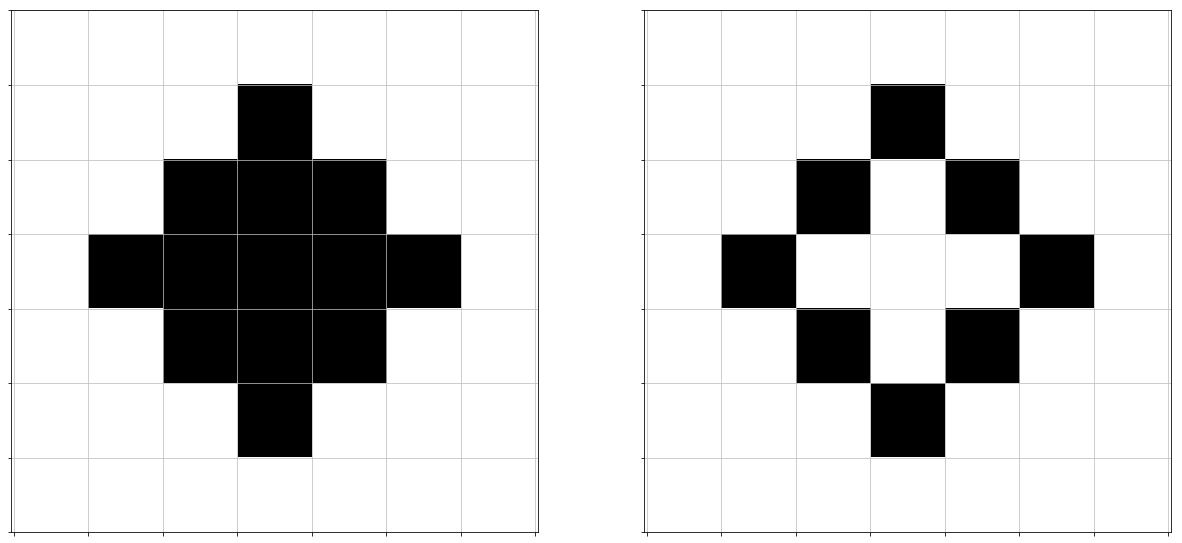

In [3]:
out1 = psi1.apply(src1)
draw_img_pair(src1, out1)

### Q1 - Passo 3: Teste do operador nas imagens de teste
O operador não encontra a imagem correta pois, por ser um operador horizontal (1x3), 
não é capaz de detectar as bordas horizontais

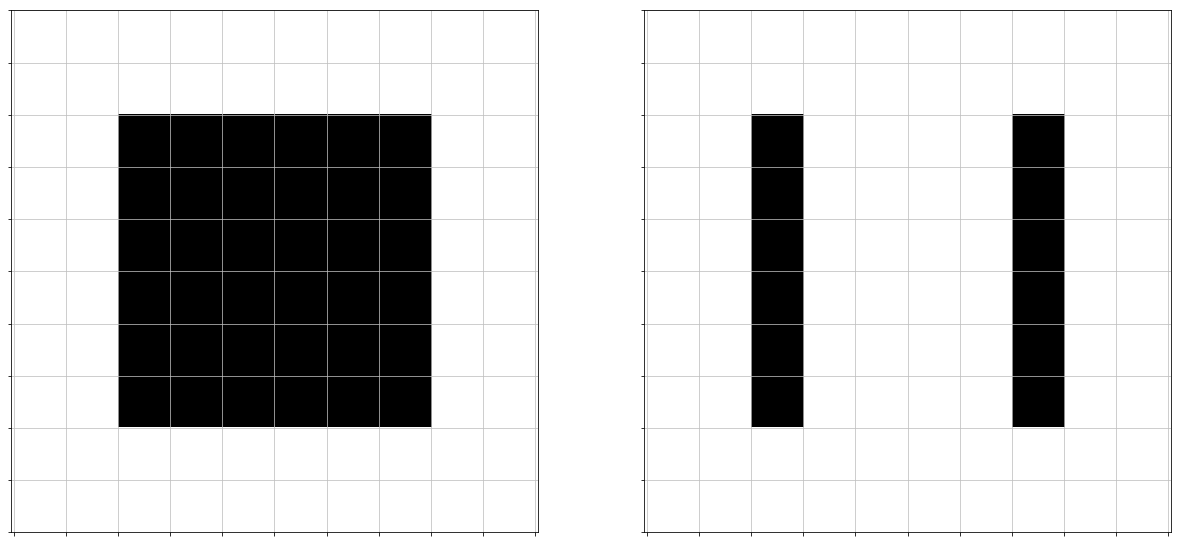

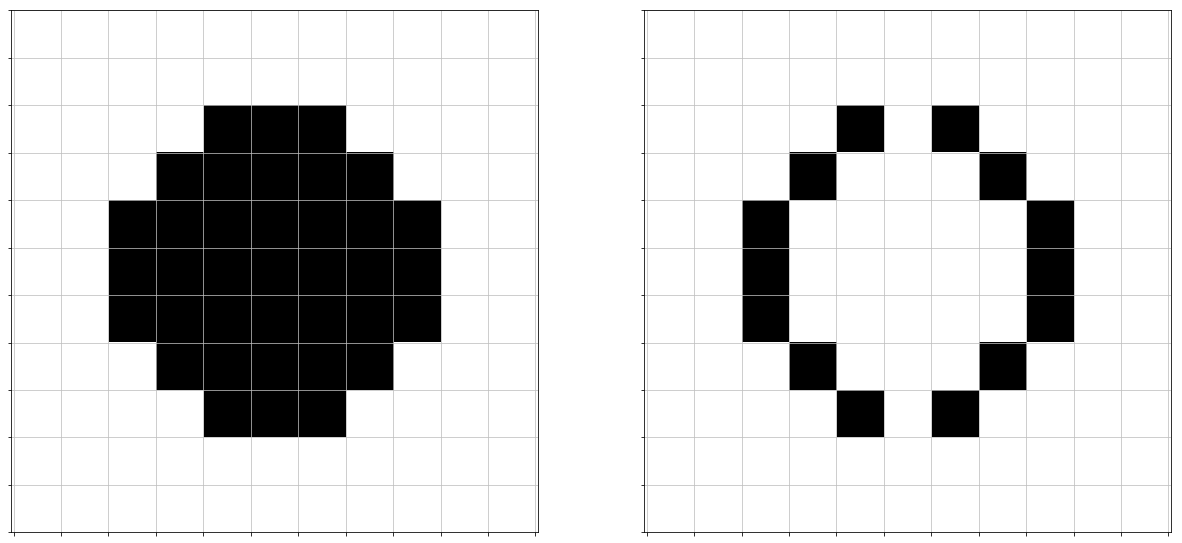

In [4]:
test1_1 = read_img('images/q1/1_test1.png')
test1_2 = read_img('images/q1/1_test2.png')

out1_1 = psi1.apply(test1_1)
draw_img_pair(test1_1, out1_1)

out1_2 = psi1.apply(test1_2)
draw_img_pair(test1_2, out1_2)

## Q2
Aprenda o operador 3x3 para detecção de bordas. Treine seu operador nas imagens da pastas images/q2/ usando os pares (q2_src\*.png, q2_dest\*.png). Teste seu operador nas imagens images/q2/q2_test.png e images/q2/q2_test2.png. Algumas das imagens de treino são desenhadas abaixo.

### Q2 - Passo 1: Estimação do operador

In [5]:
src2_1 = read_img_v2('images/q2/q2_src1.png')
src2_2 = read_img_v2('images/q2/q2_src2.png')
src2_3 = read_img_v2('images/q2/q2_src3.png')

dest2_1 = read_img_v2('images/q2/q2_dest1.png')
dest2_2 = read_img_v2('images/q2/q2_dest2.png')
dest2_3 = read_img_v2('images/q2/q2_dest3.png')

trainingdata = [(src2_1, dest2_1),(src2_2, dest2_2),(src2_3, dest2_3)]
se_mask = np.ones((3,3), dtype=bool)

psi2 = w_operator(se_mask, trainingdata)

### Q2 Passo 2 - Teste do operador encontrado nas próprias imagens de treino 

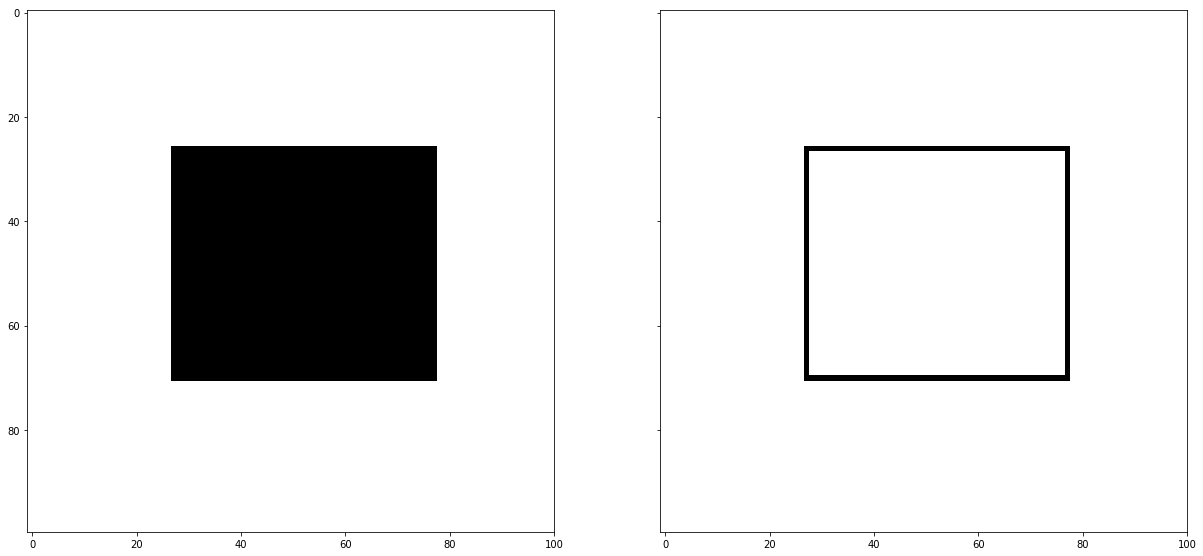

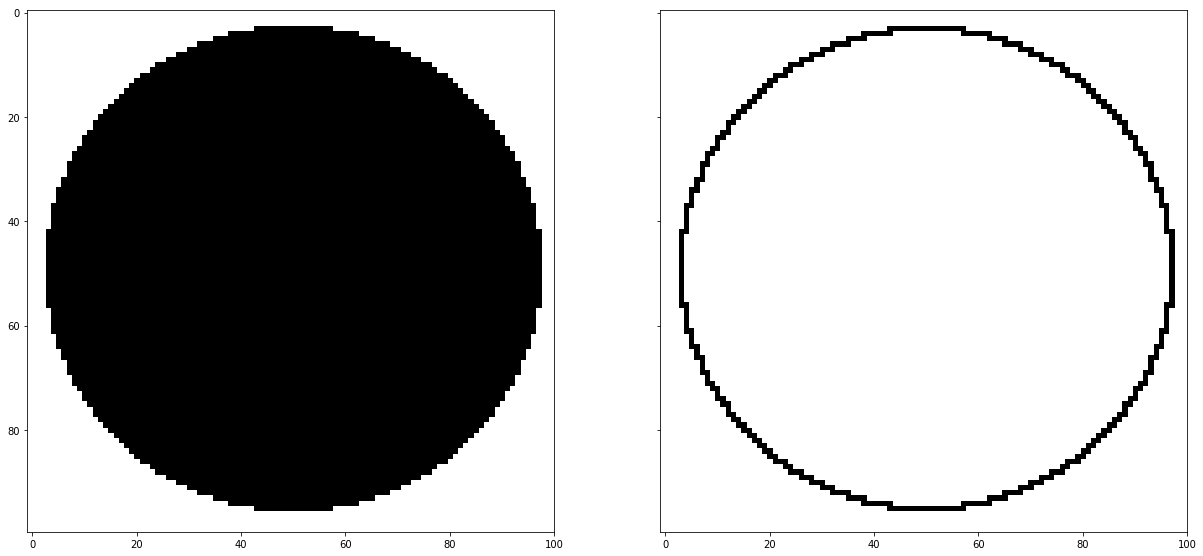

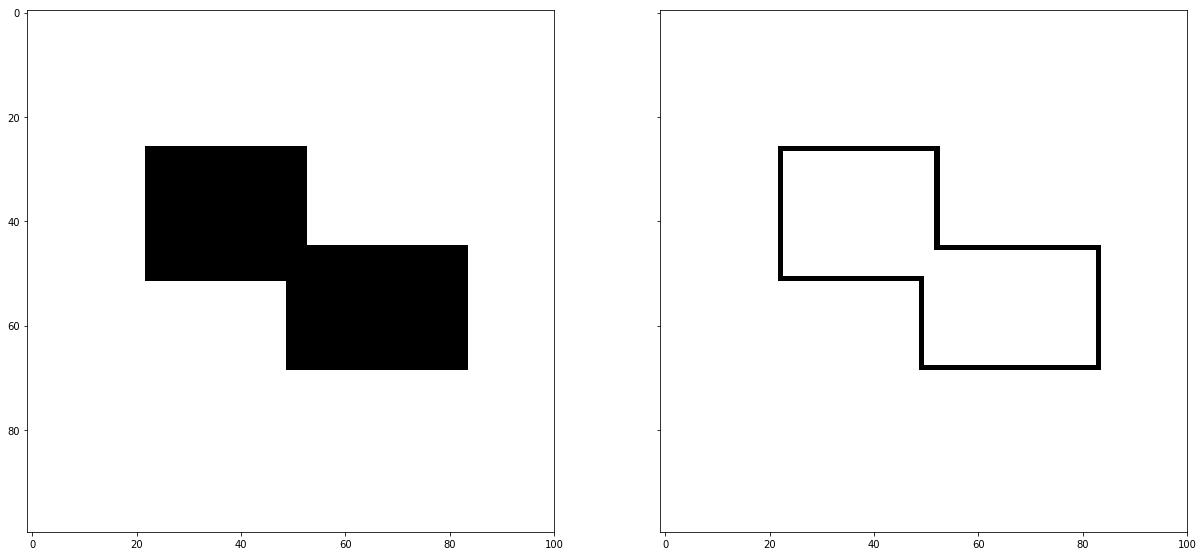

In [6]:
out2_1 = psi2.apply(src2_1)
draw_img_pair(src2_1, out2_1)

out2_2 = psi2.apply(src2_2)
draw_img_pair(src2_2, out2_2)

out2_3 = psi2.apply(src2_3)
draw_img_pair(src2_3, out2_3)

### Q2 Passo 3 - Teste do operador nas imagens de teste

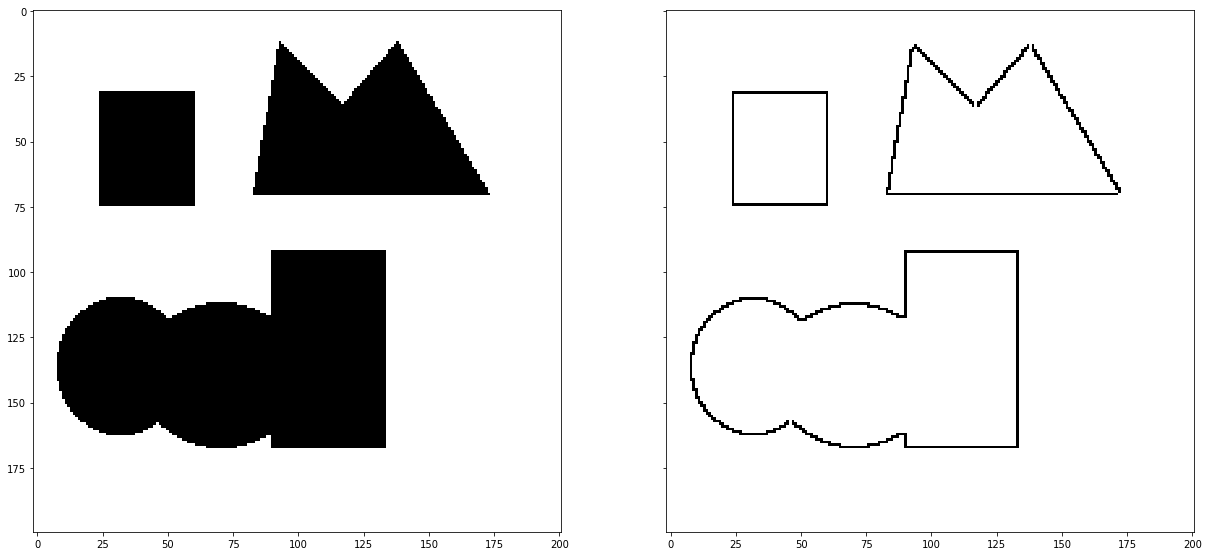

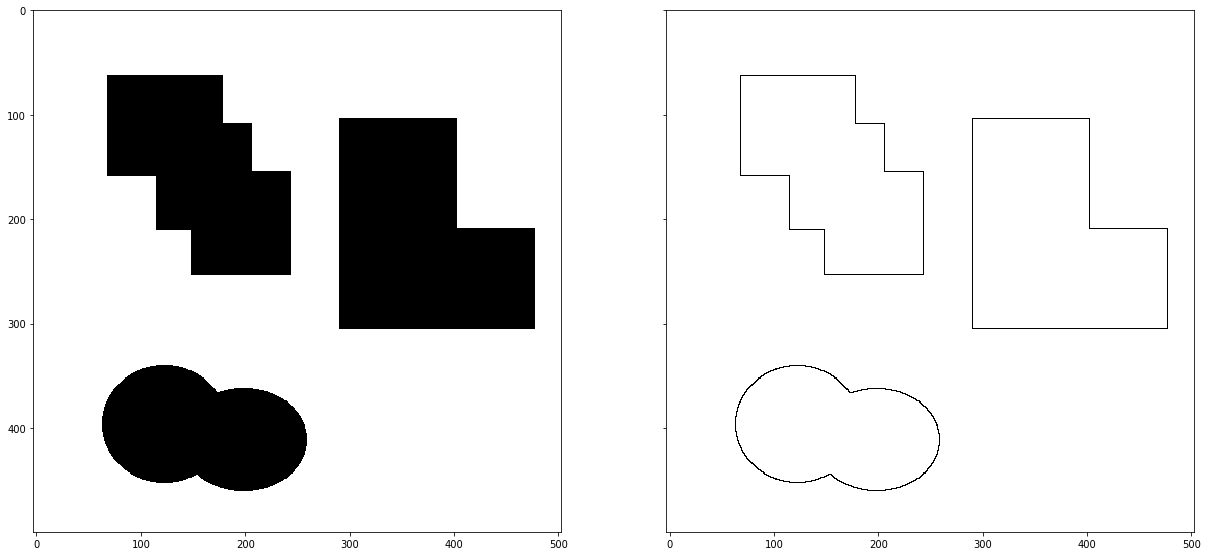

In [7]:
src2_4 = read_img("images/q2/q2_test.png")
src2_5 = read_img("images/q2/q2_test2.png")

out2_4 = psi2.apply(src2_4)
draw_img_pair(src2_4, out2_4)

out2_5 = psi2.apply(src2_5)
draw_img_pair(src2_5, out2_5)


# Q3. 
Use o algoritmo de aprendizado para obter um operador capaz de eliminar ruído. Use no treinamento as imagens images/q3/q3_src\*.png sempre com o mesmo target images/q3/q3_dest.png. Teste a janela com 5 elementos (cruz). Teste seu operador nas imagens images/q3/q3_test1.png e images/q3/q3_test2.png. Calcule e plote os erros $E_{in}$ e $E_{out}$ obtidos durante o treinamento.

In [8]:
dest3 = read_img('images/q3/q3_dest.png')

src = []
src.append(read_img('images/q3/q3_src1.png'))
src.append(read_img('images/q3/q3_src2.png'))
src.append(read_img('images/q3/q3_src3.png'))
src.append(read_img('images/q3/q3_src4.png'))
src.append(read_img('images/q3/q3_src5.png'))
src.append(read_img('images/q3/q3_src6.png'))
src.append(read_img('images/q3/q3_src7.png'))
src.append(read_img('images/q3/q3_src8.png'))
src.append(read_img('images/q3/q3_src9.png'))
src.append(read_img('images/q3/q3_src10.png'))
src.append(read_img('images/q3/q3_dest.png'))

test = []
test.append( ( read_img('images/q3/q3_test1.png'), dest3 ) )
test.append( ( read_img('images/q3/q3_test2.png'), dest3 ) )      



### Q3 Passo 1 - Treinamento e plot de Ein e Eout

A cada exemplo de treinamento adicionado, é gerado um operador e são calculados os valores: 
* e_in: distância média da imagem dest3 para o resultado da aplicação do operador atual sobre as imagens de treinamento
* e_out: distância média da imagem dest3 para o resultado da aplicação do operador atual sobre as imagens de teste

Obs.: A distância entre as imagens é calculada desconsiderando a borda

É possível observar no gráfico que, conforme mais imagens são adicionadas, tanto e_out (linha vermelha) quanto e_in decrescem rapidamente, até estabilizarem em valores bastante baixos


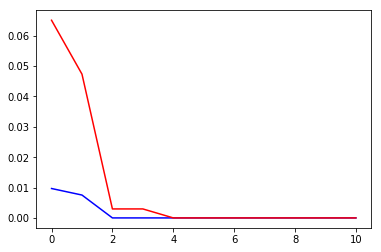

In [9]:
se_mask = se_cross(1)
psi3 = w_operator(se_mask)

train = [(x, dest3) for x in src]

ein = []
eout = []

for x in src:
    psi3.add_training_example(x, dest3) # o operador eh automaticamente atualizado ao adicionar novos exemplos
    train_i = psi3.transform(train)
    test_i = psi3.transform(test)
    ein.append(psi3.error(train_i))
    eout.append(psi3.error(test_i))
    
import matplotlib.pyplot as plt
plt.plot(ein, 'b')
plt.plot(eout, 'r')
plt.show()

### Q3 passo 2 - Teste

Aplicação do operador final (aprendido após os dez exemplos de treinamento serem adicionados) nas imagens de teste

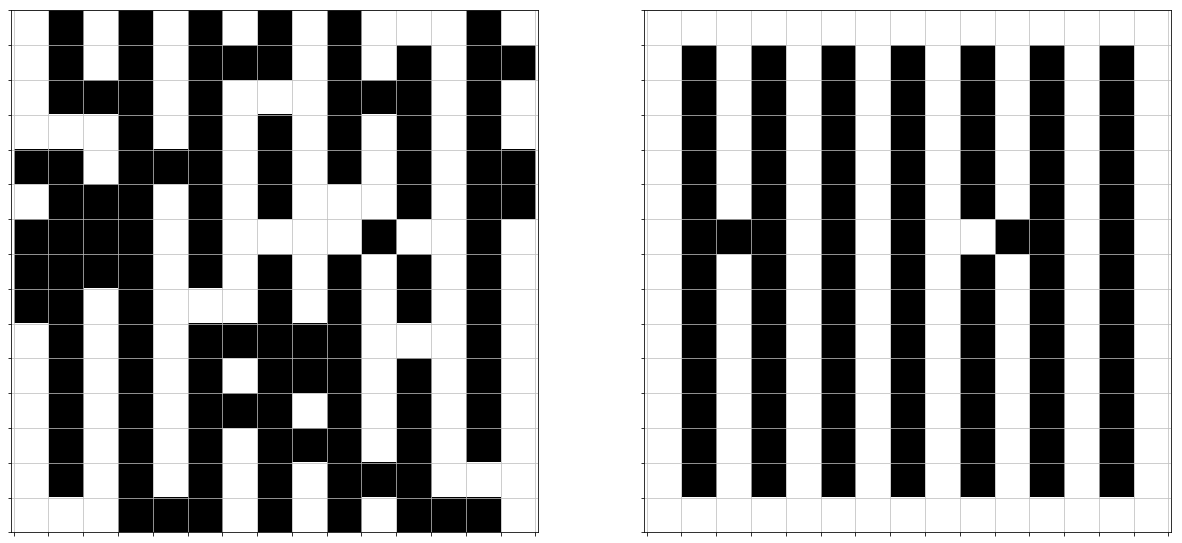

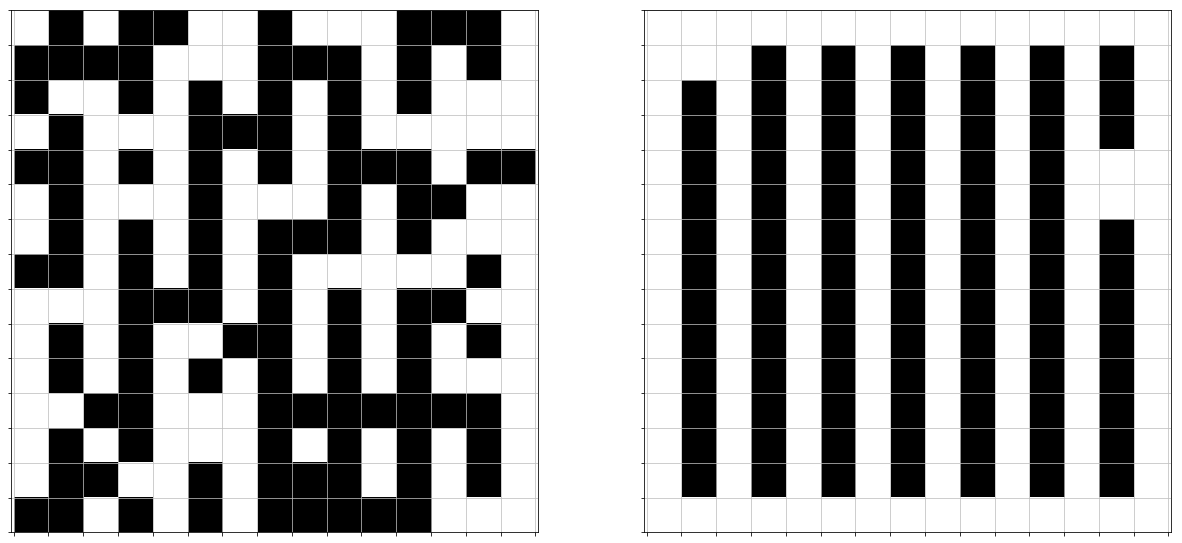

In [10]:
for test_in in [test[0][0], test[1][0]]:
    test_out = psi3.apply(test_in)
    draw_img_pair(test_in, test_out)

## Q4. 
Projete um operador para aprender a extrair a letra 's' de imagens de texto. Para isso utilize os pares de imagens q4_src\*.png q4_dest\*.png da pasta images/q4/train. Teste seu operador nas imagens da pasta images/q4/test. Utilize a composição de janelas pequenas. Avalie o erro do seu operador comparando a saída obtida por ele com a saída esperada (imagens q4_gt\*.png da pasta images/q4/test).

In [11]:
train = [
(read_img("images/q4/train/q4_src1a.png"), read_img("images/q4/train/q4_dest1a.png")),
(read_img("images/q4/train/q4_src3a.png"), read_img("images/q4/train/q4_dest3a.png")),
(read_img("images/q4/train/q4_src5a.png"), read_img("images/q4/train/q4_dest5a.png")),
(read_img("images/q4/train/q4_src7a.png"), read_img("images/q4/train/q4_dest7a.png")),
(read_img("images/q4/train/q4_src9a.png"), read_img("images/q4/train/q4_dest9a.png")),
(read_img("images/q4/train/q4_src1b.png"), read_img("images/q4/train/q4_dest1b.png")),
(read_img("images/q4/train/q4_src3b.png"), read_img("images/q4/train/q4_dest3b.png")),
(read_img("images/q4/train/q4_src5b.png"), read_img("images/q4/train/q4_dest5b.png")),
(read_img("images/q4/train/q4_src7b.png"), read_img("images/q4/train/q4_dest7b.png")),
(read_img("images/q4/train/q4_src9b.png"), read_img("images/q4/train/q4_dest9b.png")) ]


test = [
(read_img("images/q4/test/q4_test2a.png"), read_img("images/q4/test/q4_gt2a.png")),
(read_img("images/q4/test/q4_test4a.png"), read_img("images/q4/test/q4_gt4a.png")),
(read_img("images/q4/test/q4_test6a.png"), read_img("images/q4/test/q4_gt6a.png")),
(read_img("images/q4/test/q4_test8a.png"), read_img("images/q4/test/q4_gt8a.png")),    
(read_img("images/q4/test/q4_test10a.png"), read_img("images/q4/test/q4_gt10a.png")),    
(read_img("images/q4/test/q4_test2b.png"), read_img("images/q4/test/q4_gt2b.png")),
(read_img("images/q4/test/q4_test4b.png"), read_img("images/q4/test/q4_gt4b.png")),
(read_img("images/q4/test/q4_test6b.png"), read_img("images/q4/test/q4_gt6b.png")),
(read_img("images/q4/test/q4_test8b.png"), read_img("images/q4/test/q4_gt8b.png")),
(read_img("images/q4/test/q4_test10b.png"), read_img("images/q4/test/q4_gt10b.png")) ]

### Q4 - teste base

Primeiramente, iremos aplicar diretamente os operadores de janela quadrada 3x3, 5x5,7x7 e 9x9, sem composição, para avaliar o erro base. Também foram testados os elementos estrutrantes em forma de cruz e disco, mas tiveram desempenho inferior ao quadrado de mesma dimensão.

Como se pode observar abaixo (apenas a primeira imagem de teste é desenhada para cada janela, mas o erro é calculado sobre todas as 10), a janela 3x3 deu resultados visualmente ruins, em que não é possível identificar as letras, enquanto na janela 5x5 as letras são identificáveis, mas há bastante ruído (pontos espalhados pela imagem), os quais esperamos remover com a técnica de composição. Para a 9x9 e 7x7, apesar do erro das amostras de treinamento (e_in) ter sido muito baixo, o erro no teste foi alto, pior do que a janela 5x5, por causa da variância ser muito alta dentro de uma janela grande (poucos exemplos de cada padrão).



-------------- janela  3 x 3 :


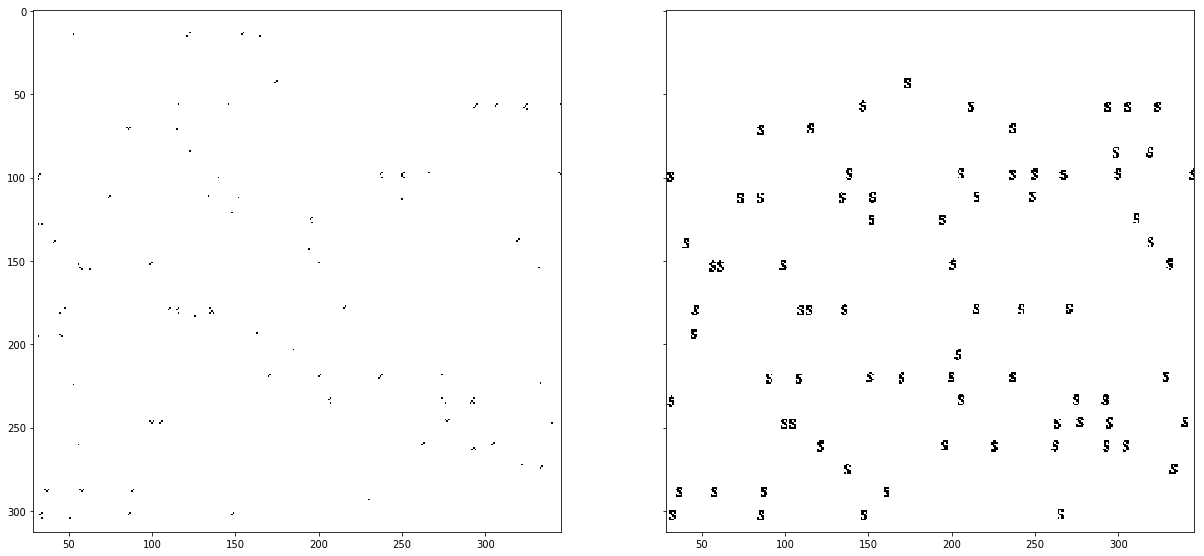

erro in :  0.00982474591174
erro out:  0.00989904153355
tempo:  5.18633389473


-------------- janela  5 x 5 :


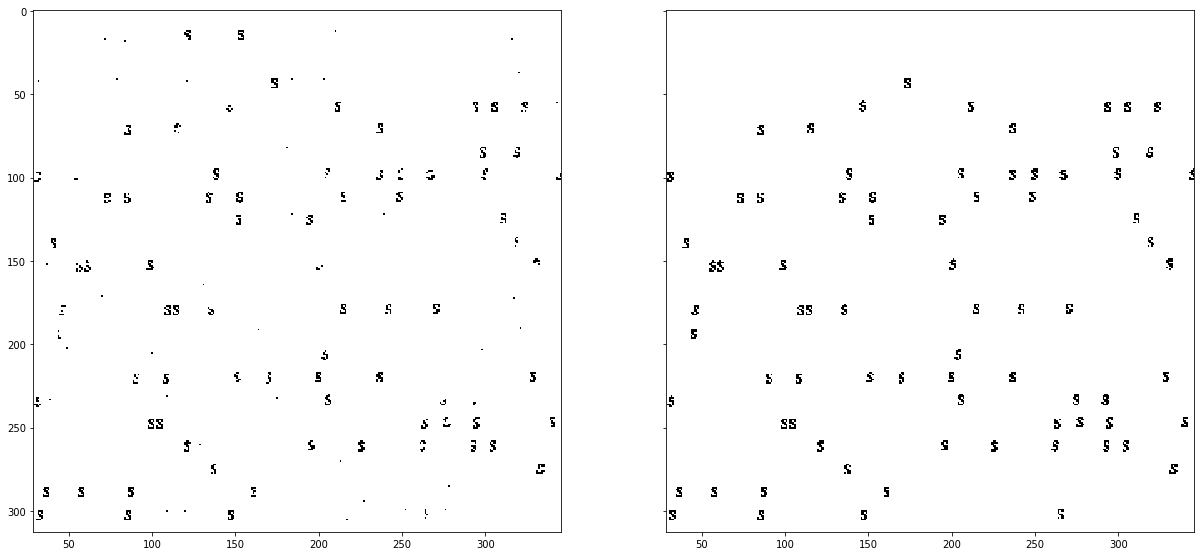

erro in :  0.000679524420136
erro out:  0.00344451544196
tempo:  5.47268819809


-------------- janela  7 x 7 :


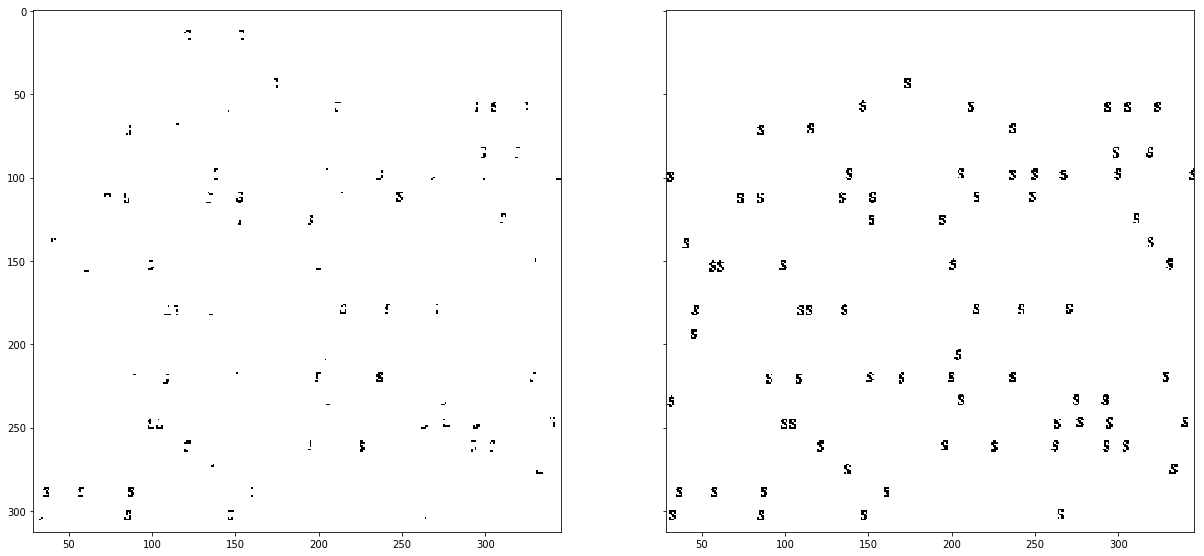

erro in :  1.50066647246e-05
erro out:  0.00779637912673
tempo:  5.89812707901


-------------- janela  9 x 9 :


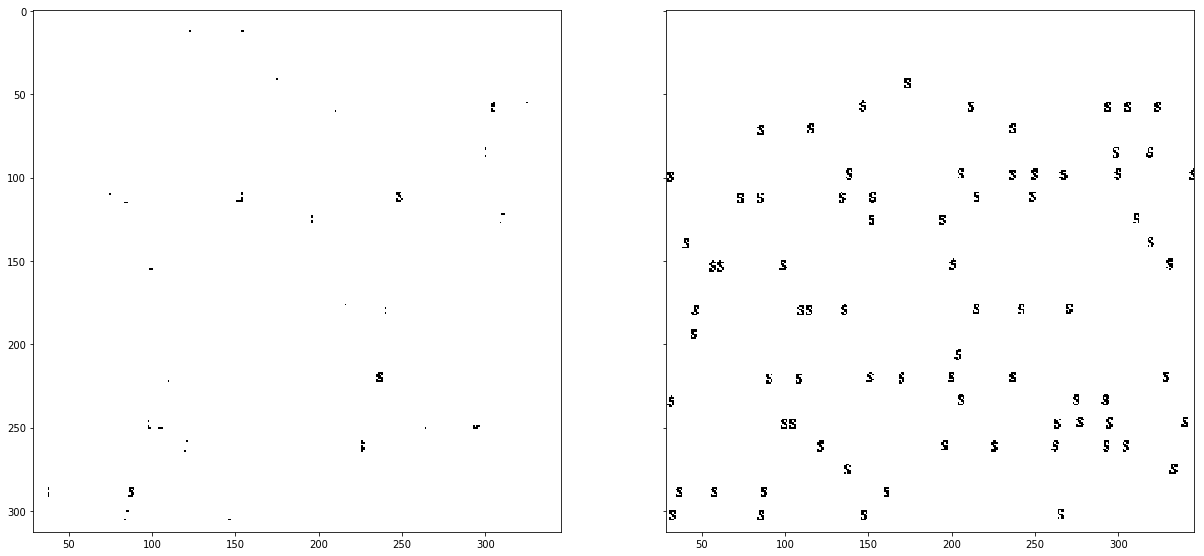

erro in :  8.93375619782e-07
erro out:  0.0098922257721
tempo:  6.69290399551


In [12]:
import time

def runtest(psi, imgset):   
    t0 = time.time()
    resultset = psi.transform(imgset)
    t1 = time.time()
    draw_img_pair(resultset[0][0], resultset[0][1]) 
    print "erro in : ", psi.error_in_sample()
    print "erro out: ", mean_dist(resultset)
    print "tempo: ", t1-t0
    

for i in range(1,5):
    w = 2*i + 1    
    print '\n\n-------------- janela ', w, 'x', w, ':'
    psi4 = w_operator(se_box(i), train)
    runtest(psi4, test)


### Q4 - composição

Foi feita então a composição de operadores sobre duas janelas 5x5, de forma que cada janela seja pequena o suficiente para não incorrer no problema da variância muito alta. 
Primeiro, é aprendido o operador psi41, a partir de 8 das 10 imagens de treinamento. Esse operador é, então aplicado ao conjunto inteiro de treinamento para gerar imagens transformadas intermediárias. Essas imagens transformadas são utilizadas como entrada para aprender um novo operador, psi42, utilizando um outro subconjunto das originais. 

Obs.: Foi testado também a divisão do conjunto de treinamento usando 5, 6, 7 e 9 membros em cada iteração, mas usar 8 gerou o m elhor resultado.

Nota-se nas imagens resultantes que o que acontece, aparentemente, é que o primeiro operador detecta algumas das letras 's', mas também confunde algumas outras que não são 's', ou seja, encontra falsos positivos. O segundo operador acaba filtrando esses falsos positivos, mesmo que a forma deles não seja ideal. Como ele acaba removendo a maior parte desses ruídos, o erro após a segunda iteração é principalmente devido à forma final das letras encontradas, que não é exata. Na terceira iteração, não se pode fazer muito em relação a isso, por isso não há mais melhora.

iteracao 1---
error in:  0.00103088391906
error out:  0.00359872204473


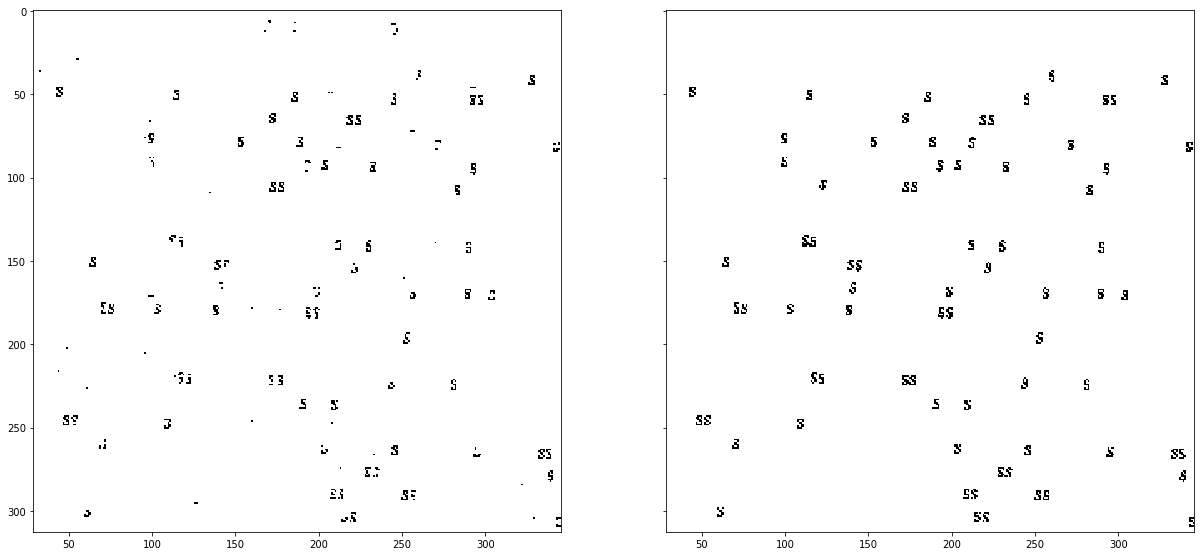

iteracao 2---
error in:  0.000952502662407
error out:  0.00347603833866


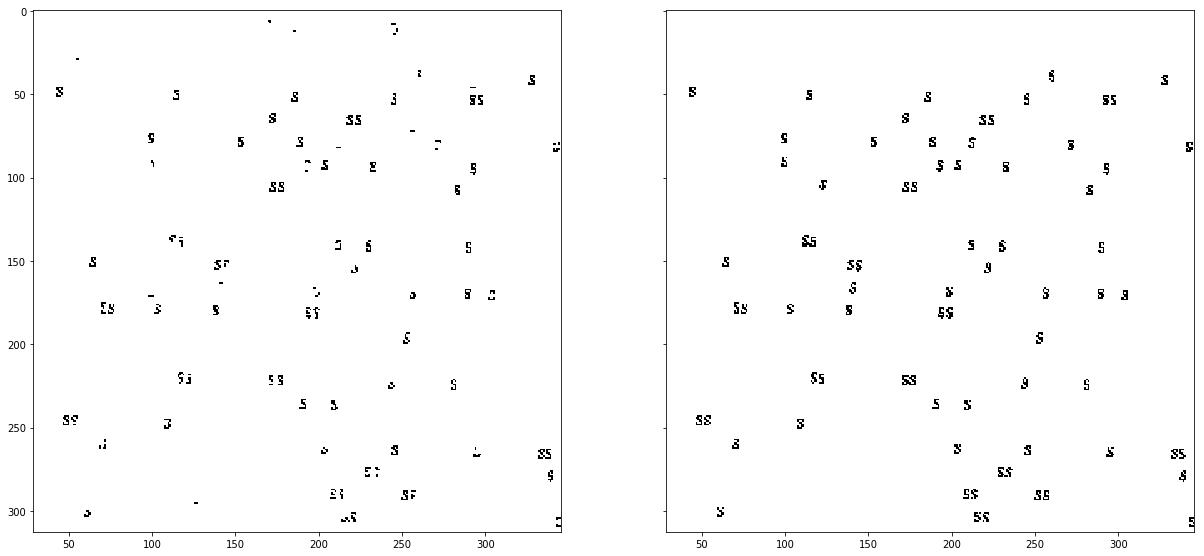

iteracao 3---
error in:  0.000952502662407
error out:  0.00347603833866


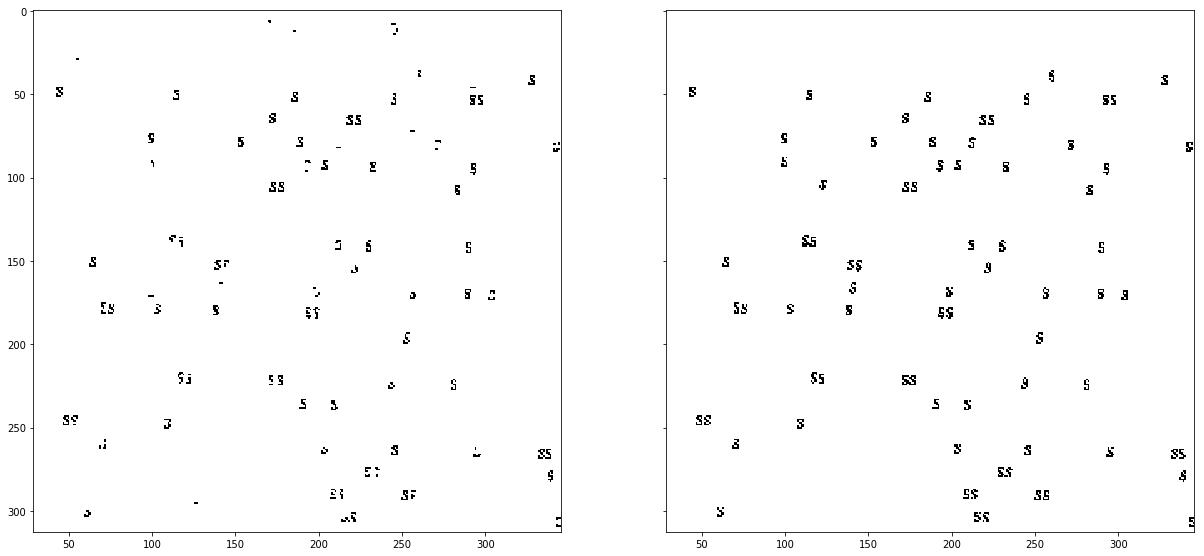

In [13]:
# iteracao 1

psi41 = w_operator(se_box(2), train[0:9])
train1 = psi41.transform(train)
iter1 = psi41.transform(test)

print 'iteracao 1---'
print 'error in: ', mean_dist(train1)
print 'error out: ', mean_dist(iter1)
draw_img_pair(iter1[1][0], iter1[1][1])

# iteracao 2

psi42 = w_operator(se_box(1), train1[1:10])
train2 = psi42.transform(train1)
iter2 = psi42.transform(iter1)

print 'iteracao 2---'
print 'error in: ', mean_dist(train2)
print 'error out: ', mean_dist(iter2)
draw_img_pair(iter2[1][0], iter2[1][1])

# iteracao 3

psi43 = w_operator(se_cross(1), train2)

train3 = psi43.transform(train2)
iter3 = psi43.transform(iter2)

print 'iteracao 3---'
print 'error in: ', mean_dist(train3)
print 'error out: ', mean_dist(iter3)
draw_img_pair(iter3[1][0], iter3[1][1])

## Q5

Utilizando a técnica de multiresolução, aprenda o operador capaz de remover ruído das imagens da pasta images/q5/. Utilize os pares de imagens (q5_src\*.png, q5_dest.png) para o treinamento e depois teste seu  operador nas imagens q5_test1.png e q5_test2.png.

In [14]:
dest5 = read_img("images/q5/q5_dest.png")

src = [read_img("images/q5/q5_src1.png"), read_img("images/q5/q5_src2.png"),
       read_img("images/q5/q5_src3.png"), read_img("images/q5/q5_src4.png"),
       read_img("images/q5/q5_src5.png"), read_img("images/q5/q5_src6.png"),
       read_img("images/q5/q5_src7.png"), read_img("images/q5/q5_src8.png"),
       read_img("images/q5/q5_src9.png"), read_img("images/q5/q5_src10.png")]
train = [(x, dest5) for x in src]

test = [read_img("images/q5/q5_test1.png"), read_img("images/q5/q5_src2.png"),
        read_img("images/q5/q5_test3.png")]



### Q5 - teste

Para comparar o resultado, foram testados os seguintes operadores:
    
* resolução simples para o teste de base
* multiresolução com quadrados dos tamanhos 9x9, 7x7, 5x5 e 3x3
* multiresolução com funções ro com pixels cada vez mais espaçados, com objetivo de detectar os padrões que acontecem em áreas ruidosas

Abaixo estão os testes, com a primeira imagem de teste para cada um dos operadores e o erro calculado sobre todas as imagens de teste para cada um deles. Conforme esperado, o melhor resultado foi o do último operador, com as funções ro de pixels espaçados, que obteve erro 0.00134. Visualmente, é possível perceber que esse operador fez um bom trabalho em fechar os buracos nos objetos (ruídos brancos sobre objetos pretos), mas ainda pode ser melhor em detectar os ruídos pretos sobre o background

original


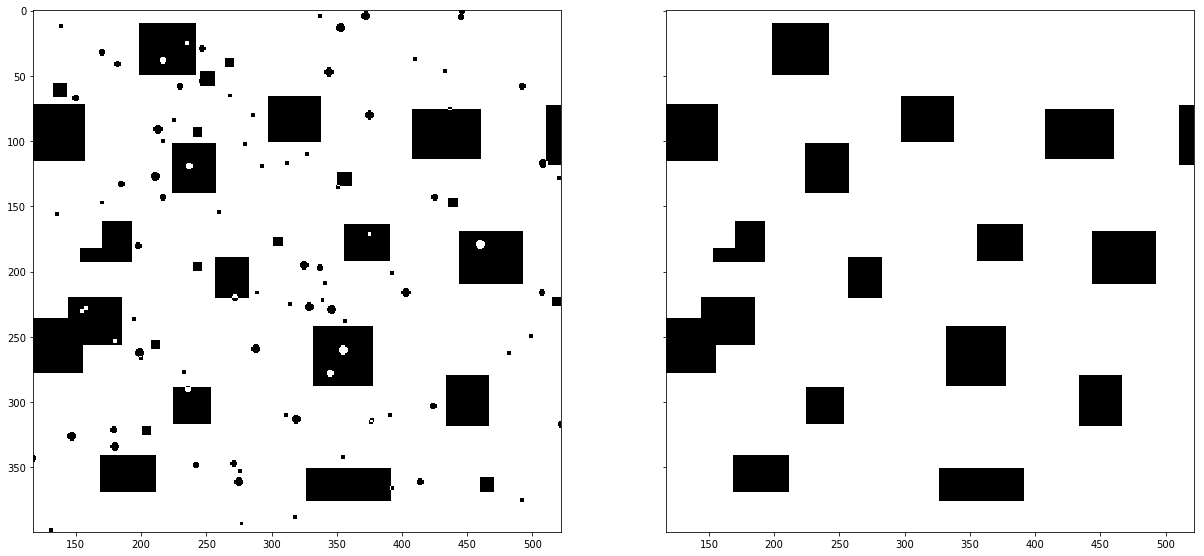


box 5x5


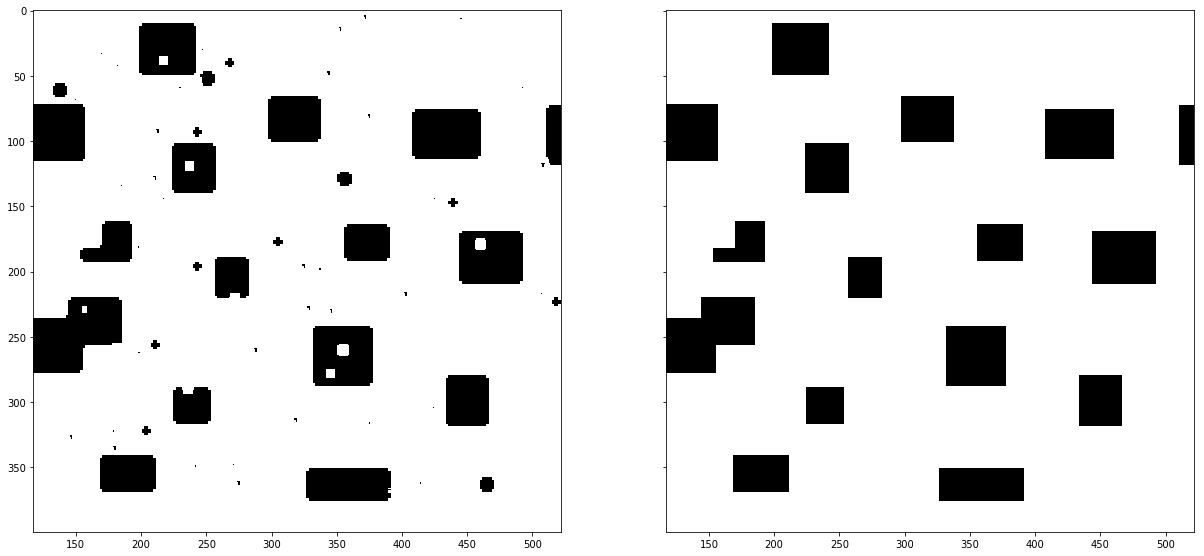

erro:  0.0144479166667

multiresolucao com quadrados


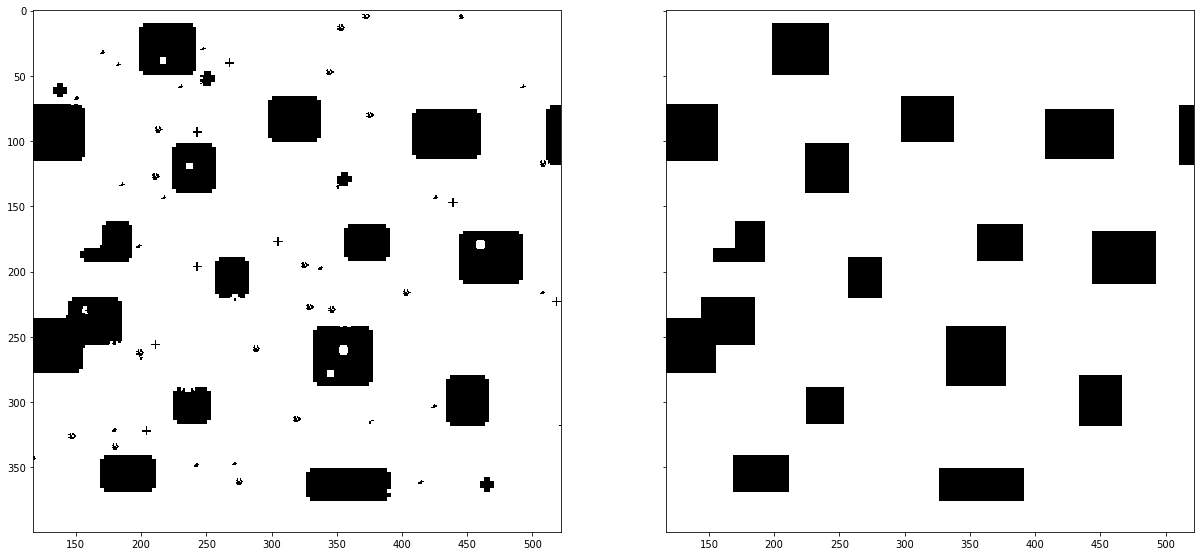

erro:  0.0142747395833

multiresolucao com funcoes ro alternando pixels sobre o quadrado


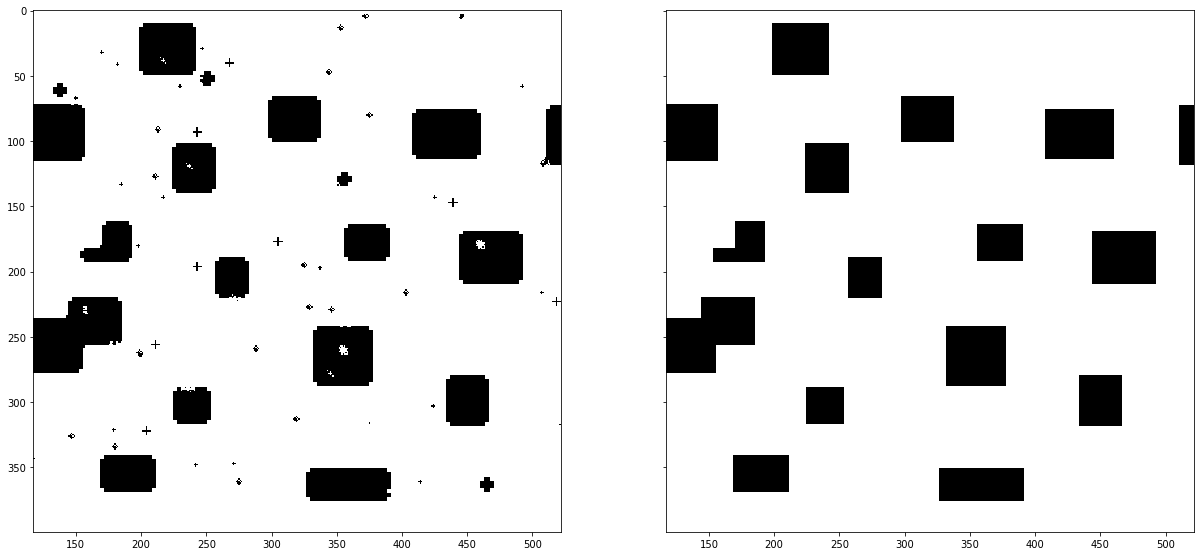

erro:  0.01348046875


In [23]:
ro_box = [se_box(3), se_box(2), se_box(1)]

alt = [True,False,True,False,True]
ro1 = np.array([alt, np.logical_not(alt), alt, np.logical_not(alt), alt])
ro2 = np.array([alt, [False for i in range(5)], alt, [False for i in range(5)], alt])
ro_multi = [se_box(3), ro1, ro2, se_cross(1)]

psi5_box = w_operator(se_box(2), train)
psi5_multibox = multiresolution(ro_box, train)
psi5_multi_ro = multiresolution(ro_multi, train)

print 'original'
draw_img_pair(test[0], dest5)
print ''
print 'box 5x5'
testres_box = [(psi5_box.apply(t), dest5) for t in test]
draw_img_pair(testres_box[0][0], dest5)
print 'erro: ', mean_dist(testres_box)
print ''
print 'multiresolucao com quadrados'
testres_multibox = [(psi5_multibox.apply(t), dest5) for t in test]
draw_img_pair(testres_multibox[0][0], dest5)
print 'erro: ', mean_dist(testres_multibox)
print ''
print 'multiresolucao com funcoes ro alternando pixels sobre o quadrado'
testres_multi = [(psi5_multi_ro.apply(t), dest5) for t in test]
draw_img_pair(testres_multi[0][0], dest5)
print 'erro: ', mean_dist(testres_multi)


## Q6. 
Utilize a técnica de envelope, como visto em sala, para remover ruído de imagens. Use o mesmo dataset da questão anterior e as funções de morfologia disponíveis em mac0460_5832/utils.py para definir as funções $\alpha$ e $\beta$. Um exemplo de erosão em uma das imagens de treino é mostrado abaixo. Comente sobre a escolha das funções $\alpha$ e $\beta$.

### Q6 - escolha dos operadores

A escolha da função beta, que deve ser po limite superior, ou seja, "errar para mais", deve tapar os buracos brancos dentro dos objetos. Por isso, foi escolhido fazer um fechamento e uma dilatação.

Para a função alfa, que deve ser inferior, "errando para menos" e jogando fora o ruído preto sobre o background, foi escolhido usar uma abertura e uma erosão

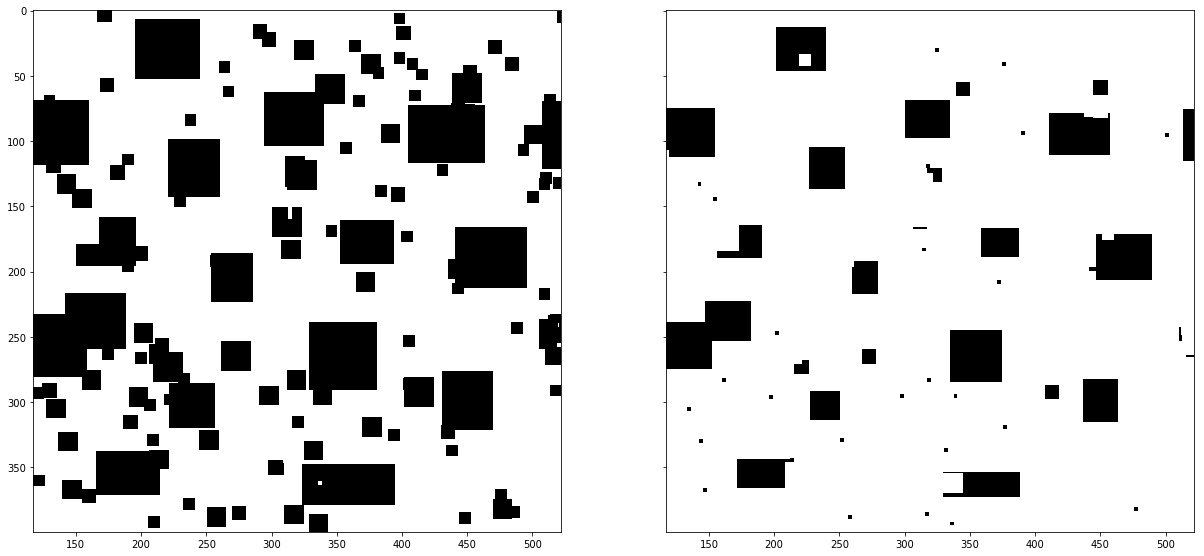

In [88]:
src6_1 = read_img("images/q5/q5_src1.png")

beta1 = dilation(src6_1, se_box(1))
beta2 = erosion(beta1, se_box(1))
beta3 = dilation(beta2, se_box(3))
#beta4 = erosion(beta3, se_box(3))

alfa1 = erosion(src6_1, se_box(1))
alfa2 = dilation(alfa1, se_box(1))
alfa3 = erosion(alfa2, se_box(3))
#alfa4 = dilation(alfa3, se_box(3))

draw_img_pair(beta3, alfa3)

#a = np.logical_or(src6_1, alfa3)
#phi = np.logical_and(a, beta3)

#draw_img_pair(src6_1, phi)


Q7. Utilize a técnica de envelope com multiresolução para aprender um operador capaz de remover ruído de imagens. Para cada uma das janelas, defina funções $\alpha$ e $\beta$ (podem ser diferentes). Compare o resultado obtido aplicando a mistura de técnicas com os resultados das duas questões anteriores.

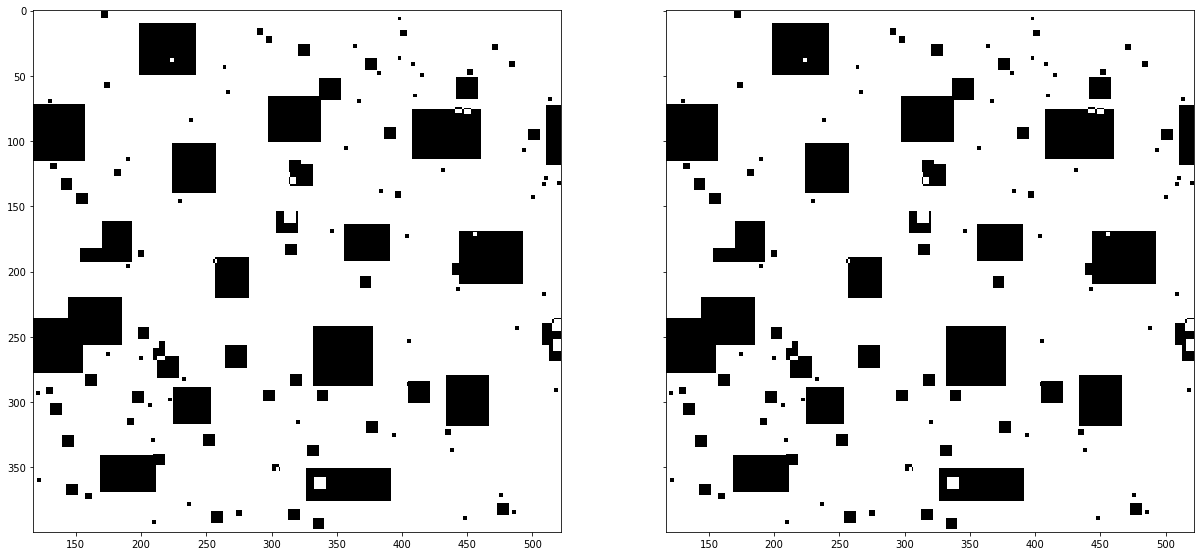

In [70]:
a = np.logical_or(train[0][0], alfa3)
b = np.logical_and(a, beta3)
draw_img_pair(a,b)

Q8. A função gen_rand_imgs abaixo retorna um par de imagens. A primeira contém alguns pontos gerados aleatoriamente. A segunda é a dilatação da primeira por um elemento estruturante em forma de cruz. Aprenda o operador capaz de realizar essa transformação, gerando os pares de src e dest. Crie os dados de treinamento baseado na equação vista em sala ($m(\epsilon, \delta, H) = \frac{1}{\epsilon}ln\frac{|H|}{\delta}$). Compare o resultado obtido pelo seu classificador (gere mais pares para teste e ter uma estimativa de $E_{out}$) para $\epsilon = [0.2, 0.1]$ e $\delta = [0.3, 0.2]$.

In [ ]:
def gen_rand_imgs():
    noise = np.zeros((20, 20)).astype(bool)
    num_pixels = 20
    x = np.random.randint(0, 20, num_pixels)
    y = np.random.randint(0, 20, num_pixels)

    for i in range(num_pixels):
        noise[x[i], y[i]] = 1

    return noise, dilation(noise, se_cross(1))

src5_1, dest5_1 = gen_rand_imgs()
src5_2, dest5_2 = gen_rand_imgs()
draw_img_pair(src5_1, dest5_1)
draw_img_pair(src5_2, dest5_2)